# Housing Price Prediction in Lagos, Nigeria

![Housing Market](https://i.postimg.cc/43tF36JH/LAGOS.jpg)

## Introduction
The real estate market in Lagos is dynamic, with property prices influenced by various factors such as location, number of bedrooms, and amenities. Accurately predicting housing prices can help buyers, sellers, and investors make informed decisions. In this notebook, we will analyze a dataset containing property listings and develop a machine learning model to predict housing prices in Lagos.

### Objective
To develop a predictive model using machine learning algorithms to forecast housing prices in Lagos, Nigeria.

### Summary Objective
- Analyzing the real estate market in Lagos to create a predictive model that can help stakeholders make informed decisions.
- To analyze the relationship between various factors and housing prices in Lagos, Nigeria.
- To develop an accurate predictive model that can forecast housing prices in Lagos, Nigeria, and identify the most influential factors affecting housing prices.

### Methodology
The project will utilize a dataset from **Open Africa** (https://open.africa/dataset/cost-of-housing-in-lagos) containing information on housing prices in Lagos. The dataset will be preprocessed, and four machine learning models will be implemented:

1. **Linear Regression Model**
2. **Random Forest Regressor**
3. **Gradient Boosting Regressor**
4. **Support Vector Regressor (SVR)**

The project aims to:
1. Develop a predictive model that can accurately forecast housing prices in Lagos, Nigeria.
2. Evaluate the performance of the four machine learning models.
3. Identify the most influential factors affecting housing prices in Lagos.

### Conclusion
This project will contribute to the understanding of the real estate market in Lagos, Nigeria, and provide a valuable tool for stakeholders to make informed decisions.

### Recommendations
Future research can focus on incorporating additional data sources, exploring other machine learning algorithms, and developing a web-based application for easy access to the predictive model.

## Table of Contents

- [Importing Libraries](#importing-libraries)
- [Loading Data](#loading-data)
- [Data Overview to Understand Its Structure](#data-overview-to-understand-its-structure)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Data Preprocessing](#data-preprocessing)
- [Modeling](#modeling)
- [Results](#results)

## Importing Libraries
To begin our analysis and modeling, we first need to import essential Python libraries

In [5]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,GridSearchCV  
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer 
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from ipywidgets import interact, IntSlider, Dropdown
from IPython.display import display
  


In [6]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## Loading Data


In [7]:
file_path = r"housing_lagos.csv"
df = pd.read_csv(file_path)

## Data Overview to Understand Its Structure

In [8]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [9]:
df.shape

(53070, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53070 entries, 0 to 53069
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         53070 non-null  object
 1   More Info     53070 non-null  object
 2   Price         53070 non-null  object
 3   Serviced      53070 non-null  int64 
 4   Newly Built   53070 non-null  int64 
 5   Furnished     53070 non-null  int64 
 6   Bedrooms      53070 non-null  object
 7   Bathrooms     53070 non-null  object
 8   Toilets       53070 non-null  object
 9   City          53070 non-null  object
 10  Neighborhood  53070 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.5+ MB


Observations:

The dataset has 53070 rows and 11 columns.

Some numerical columns (Price, Bedrooms, Bathrooms, Toilets) are stored as objects (strings) and need conversion.

The dataset does not have missing values (Non-Null Count = 53070 for all columns).

## Exploratory Data Analysis (EDA)

Clean and Convert Data Types an Convert Columns to Numeric

In [11]:
df["Price"]

0        5,000,000/year
1        5,000,000/year
2             3,500,000
3             2,700,000
4             4,000,000
              ...      
53065           500,000
53066           400,000
53067           600,000
53068           950,000
53069           400,000
Name: Price, Length: 53070, dtype: object

In [12]:
df["Price"] = (
    df["Price"]
    .str.split("/").str[0] 
    .str.replace(",", "", regex=True) 
    .astype(int) 
)

In [13]:
df["Price"]

0        5000000
1        5000000
2        3500000
3        2700000
4        4000000
          ...   
53065     500000
53066     400000
53067     600000
53068     950000
53069     400000
Name: Price, Length: 53070, dtype: int64

In [14]:
df["Bedrooms"]

0        4 beds
1        4 beds
2        2 beds
3        2 beds
4        4 beds
          ...  
53065    1 beds
53066    1 beds
53067    2 beds
53068    3 beds
53069    1 beds
Name: Bedrooms, Length: 53070, dtype: object

In [15]:
df["Bedrooms"].value_counts()

Bedrooms
3 beds     13762
1 beds     10770
2 beds     10200
4 beds      9258
0 beds      4781
5 beds      2929
beds         759
6 beds       291
10 beds      154
7 beds        82
8 beds        62
9 beds        22
Name: count, dtype: int64

In [16]:
# Remove " beds" and convert to integer
df["Bedrooms"] = df["Bedrooms"].str.replace(" beds", "", regex=True).str.extract(r"(\d+)")

# Display cleaned column
print(df["Bedrooms"].head())

0    4
1    4
2    2
3    2
4    4
Name: Bedrooms, dtype: object


In [17]:
df["Bathrooms"]

0        4 baths
1        4 baths
2        3 baths
3        3 baths
4        5 baths
          ...   
53065    2 baths
53066    1 baths
53067    2 baths
53068    2 baths
53069    1 baths
Name: Bathrooms, Length: 53070, dtype: object

In [18]:
# Remove " baths" and convert to integer
df["Bathrooms"] = df["Bathrooms"].str.replace(" baths", "", regex=True)

# Display cleaned column
print(df["Bathrooms"].head())


0    4
1    4
2    3
3    3
4    5
Name: Bathrooms, dtype: object


In [19]:
df["Toilets"]

0        5 Toilets
1        5 Toilets
2        3 Toilets
3        3 Toilets
4        5 Toilets
           ...    
53065    2 Toilets
53066    1 Toilets
53067    3 Toilets
53068    2 Toilets
53069    1 Toilets
Name: Toilets, Length: 53070, dtype: object

In [20]:
# Remove " Toilets" and convert to integer
df["Toilets"] = df["Toilets"].str.replace(" Toilets", "", regex=True)

# Display cleaned column
print(df["Toilets"].head())

0    5
1    5
2    3
3    3
4    5
Name: Toilets, dtype: object


Check Outliers

In [21]:
print(df.describe())

              Price      Serviced  Newly Built     Furnished
count  5.307000e+04  53070.000000  53070.00000  53070.000000
mean   4.297018e+07      0.209761      0.28306      0.115640
std    7.383023e+09      0.407142      0.45049      0.319795
min    1.000000e+00      0.000000      0.00000      0.000000
25%    9.000000e+05      0.000000      0.00000      0.000000
50%    2.000000e+06      0.000000      0.00000      0.000000
75%    4.500000e+06      0.000000      1.00000      0.000000
max    1.700000e+12      1.000000      1.00000      1.000000


Check for Missing Values

In [22]:
print(df.isnull().sum())

Title             0
More Info         0
Price             0
Serviced          0
Newly Built       0
Furnished         0
Bedrooms        759
Bathrooms         0
Toilets           0
City              0
Neighborhood      0
dtype: int64


## Data Preprocessing

In [23]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000,0,1,0,4,4,5,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000,0,1,0,4,4,5,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000,1,0,0,2,3,3,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000,1,1,0,2,3,3,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000,1,0,0,4,5,5,Lekki,Chevron


In [24]:
print(df["Price"].value_counts())


Price
1500000      2666
2500000      2484
3500000      2300
3000000      2289
2000000      2212
             ... 
56000000        1
960000          1
265000          1
750000000       1
1470000         1
Name: count, Length: 523, dtype: int64


<Axes: xlabel='Price', ylabel='Count'>

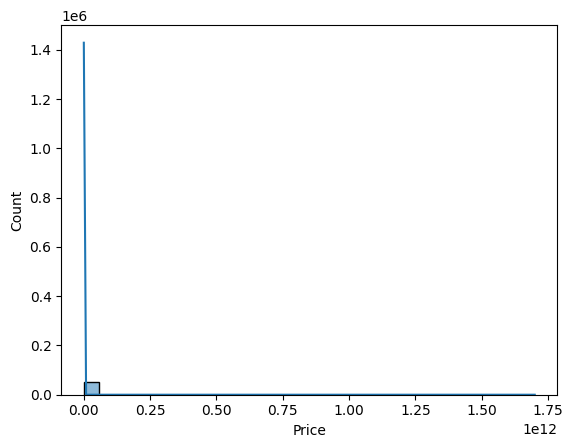

In [25]:
df_house_price_500m = df[df["Price"] < 100000000]
sns.histplot(df["Price"], bins=30, kde=True)


Handling Rare Outliers to remove rare outliers that distort the analysis:

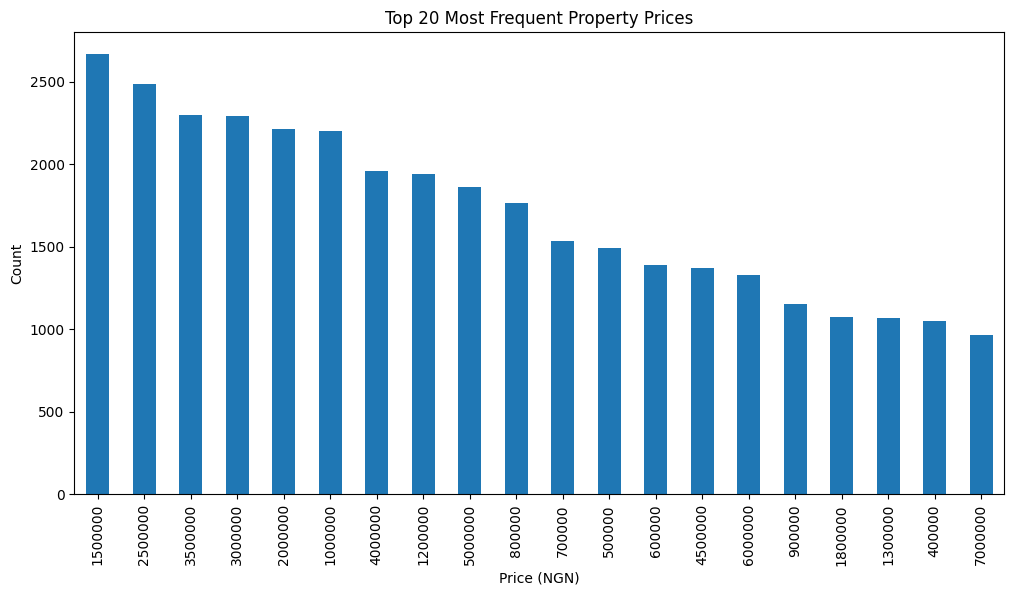

In [26]:
top_prices = df["Price"].value_counts().head(20)
top_prices.plot(kind="bar", figsize=(12,6))
plt.title("Top 20 Most Frequent Property Prices")
plt.xlabel("Price (NGN)")
plt.ylabel("Count")
plt.show()

In [27]:
print(df["City"].value_counts())  # Check distribution of cities

City
Lekki       19150
Ajah         6258
Yaba         5018
Ojodu        4695
Ikoyi        4366
Surulere     3835
Gbagada      3554
Ikeja        3531
Island       2663
Name: count, dtype: int64


In [28]:
print(df["Neighborhood"].nunique())  # Check number of unique neighborhoods

69


In [29]:
# Declare variable `mean_price_by_city`
mean_price_by_city = df.groupby("City")["Price"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_city type:", type(mean_price_by_city))
print("mean_price_by_city shape:", mean_price_by_city.shape)
mean_price_by_city

mean_price_by_city type: <class 'pandas.core.series.Series'>
mean_price_by_city shape: (9,)


City
Island      6.761860e+08
Ikoyi       2.100493e+07
Ikeja       1.231490e+07
Lekki       1.135814e+07
Surulere    8.726536e+06
Ajah        6.659925e+06
Gbagada     6.646557e+06
Ojodu       3.735125e+06
Yaba        2.140692e+06
Name: Price, dtype: float64

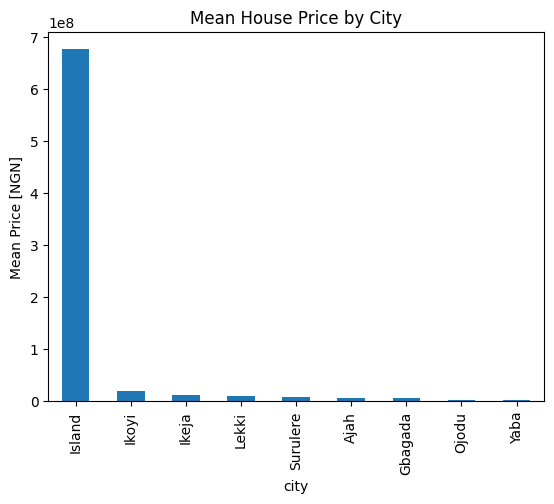

In [30]:
# Create bar chart from `mean_price_by_city` using pandas
mean_price_by_city.plot(
    kind="bar",
    xlabel="city",
    ylabel="Mean Price [NGN]",
    title="Mean House Price by City"

);

**Island City Houses** are the most expensive real estate market in Lagos City while 

**Yaba City Houses** are the least expensive real estate market in Lagos City,

which aligns according to recent GDP numbers 2025

In [31]:
# Declare variable `mean_price_by_neighborhood`
mean_price_by_neighborhood = df.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_neighborhood type:", type(mean_price_by_neighborhood))
print("mean_price_by_neighborhood shape:", mean_price_by_neighborhood.shape)
mean_price_by_neighborhood

mean_price_by_neighborhood type: <class 'pandas.core.series.Series'>
mean_price_by_neighborhood shape: (69,)


Neighborhood
Victoria Island Extension    1.179846e+10
Ojuelegba                    1.652363e+08
Awolowo Road                 9.120675e+07
Other Victoria Island        6.741158e+07
Banana Island                2.737111e+07
                                 ...     
Jibowu                       9.982803e+05
Olowora                      8.988114e+05
Lawanson                     6.743646e+05
Ijesha                       6.658272e+05
Oworonshoki                  5.116766e+05
Name: Price, Length: 69, dtype: float64

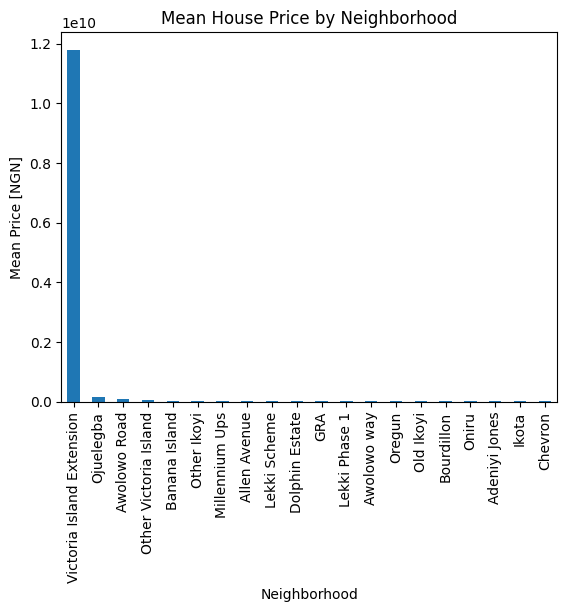

In [32]:
# Group by Neighborhood and compute mean price
mean_price_by_neighborhood = df.groupby("Neighborhood")["Price"].mean()

# Select the first 20 neighborhoods with the highest mean price
mean_price_by_neighborhood.sort_values(ascending=False).head(20).plot(
    kind="bar",
    xlabel="Neighborhood",
    ylabel="Mean Price [NGN]",
    title="Mean House Price by Neighborhood"
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


**Victoria Island Extension Houses** are the most expensive real estate market in Lagos Neighborhood 

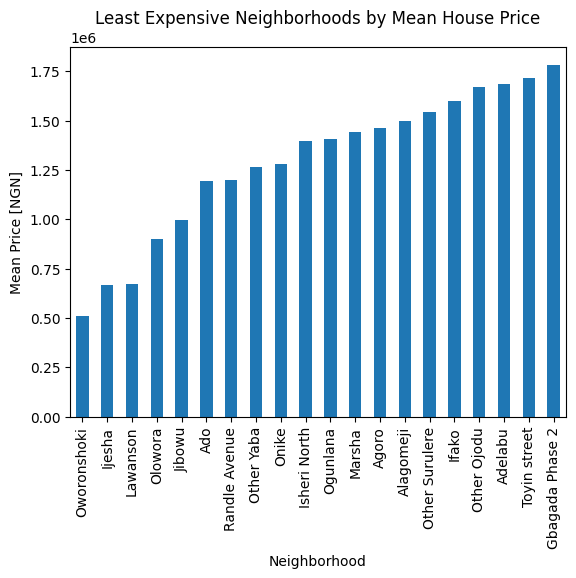

In [33]:
# Group by Neighborhood and compute mean price
mean_price_by_neighborhood = df.groupby("Neighborhood")["Price"].mean()

# Select the first 20 neighborhoods with the lowest mean price
mean_price_by_neighborhood.sort_values(ascending=True).head(20).plot(
    kind="bar",
    xlabel="Neighborhood",
    ylabel="Mean Price [NGN]",
    title="Least Expensive Neighborhoods by Mean House Price"
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


**Oworonshoki** is the least expensive real estate market in Lagos Neighborhood

In [34]:
df["Neighborhood"].value_counts()

Neighborhood
Lekki Phase 1      5262
Other Lekki        3880
Other Ajah         2639
Chevron            2511
Ikate              2047
                   ... 
alausa              130
Awolowo Road         96
Ligali Ayorinde      93
Dolphin Estate       77
1004                 73
Name: count, Length: 69, dtype: int64

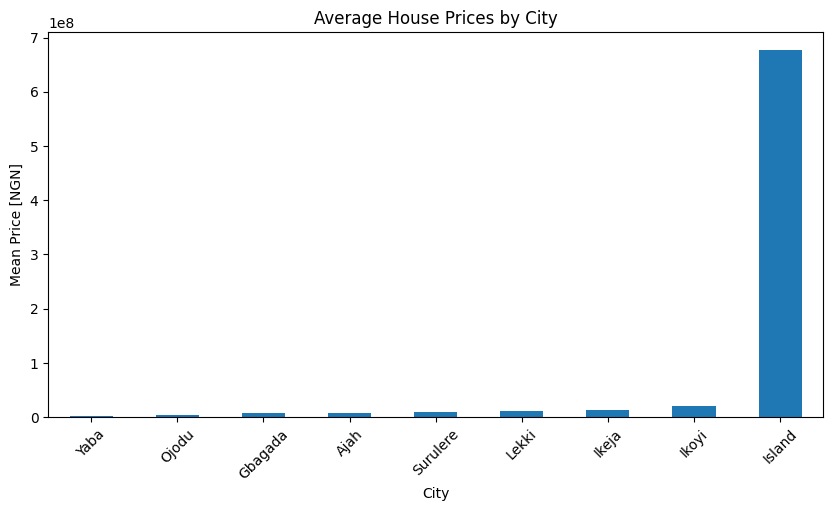

In [35]:
mean_price_by_city = df.groupby("City")["Price"].mean().sort_values()

# Plot a bar chart
mean_price_by_city.plot(kind="bar", figsize=(10,5), title="Average House Prices by City")
plt.xticks(rotation=45)
plt.ylabel("Mean Price [NGN]")
plt.show()


In [36]:
trimmed_df = q1, q9 = df["Price"].quantile([0.15,0.85])
mask_df = df["Price"].between(q1,q9)
trimmed_df = df[mask_df]
trimmed_df

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000,0,1,0,4,4,5,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000,0,1,0,4,4,5,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000,1,0,0,2,3,3,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000,1,1,0,2,3,3,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000,1,0,0,4,5,5,Lekki,Chevron
...,...,...,...,...,...,...,...,...,...,...,...
53052,Newly Built 2bed Room Yaba,2 BEDROOM FLAT / APARTMENT FOR RENT,1500000,0,1,1,2,2,3,Yaba,Other Yaba
53054,Direct Brief Lovely And Clean With Neat Compou...,2 BEDROOM FLAT / APARTMENT FOR RENT,1500000,0,1,0,2,2,3,Yaba,Agoro
53059,Ensuit 2bed Flat,2 BEDROOM BLOCKS OF FLATS FOR RENT,1000000,0,1,0,2,2,3,Yaba,Alagomeji
53060,Ensuite 3 Bedroom With A B/q,3 BEDROOM FLAT / APARTMENT FOR RENT,1500000,0,0,1,3,3,4,Yaba,Onike


In [37]:
trimmed_df['Neighborhood'].unique()

array(['Agungi', 'Other Lekki', 'Osapa London', 'Ologolo', 'Chevron',
       'Lekki Phase 1', 'Ikate', 'Ikota', 'Other Ikoyi', 'Banana Island',
       'Parkview Estate', 'Old Ikoyi', 'Osborne Foreshore Estate',
       'Dolphin Estate', 'Awolowo Road', 'Bourdillon', 'Opebi', 'Oregun',
       'Adeniyi Jones', 'Other Ikeja', 'Allen Avenue', 'Toyin street',
       'GRA', 'alausa', 'Awolowo way', 'Oniru', '1004',
       'Other Victoria Island', 'Ligali Ayorinde',
       'Victoria Island Extension', 'Adeola Odeku', 'Omole Phase 1',
       'Isheri North', 'Magodo Gra Phase 1', 'Other Ojodu',
       'Omole Phase 2', 'Ojodu Berger', 'Olowora', 'Gbagada Phase 1',
       'Other Gbagada', 'Medina', 'Soluyi', 'Ifako', 'Millennium Ups',
       'Oworonshoki', 'Gbagada Phase 2', 'Bode thomas', 'Other Surulere',
       'Adelabu', 'Marsha', 'Aguda', 'Ogunlana', 'Ijesha', 'Lawanson',
       'Randle Avenue', 'Ojuelegba', 'Lekki Scheme', 'Other Ajah',
       'Badore', 'Sangotedo', 'Ado', 'Onike', 'Other Ya

In [38]:
records = trimmed_df["Neighborhood"].value_counts()
records

Neighborhood
Lekki Phase 1      4005
Other Lekki        3250
Chevron            2332
Other Ajah         2077
Ikate              1783
                   ... 
Ligali Ayorinde      50
Awolowo Road         50
Oworonshoki          49
Adeola Odeku         44
Bourdillon           16
Name: count, Length: 69, dtype: int64

In [39]:
# remove the Neighborhood with few entries
trimmed_df = trimmed_df[~trimmed_df["Neighborhood"].isin(records[records < 100].index)]

In [40]:
trimmed_df["Neighborhood"].value_counts()

Neighborhood
Lekki Phase 1               4005
Other Lekki                 3250
Chevron                     2332
Other Ajah                  2077
Ikate                       1783
Ikota                       1708
Osapa London                1608
Oniru                       1042
Sangotedo                   1034
Agungi                       906
Magodo Gra Phase 1           834
Badore                       822
Ifako                        743
Ologolo                      685
Other Surulere               678
Isheri North                 637
Other Yaba                   566
Other Ikeja                  564
Aguda                        560
Alagomeji                    551
Soluyi                       540
Adeniyi Jones                489
Akoka                        484
Omole Phase 2                470
Ojodu Berger                 458
Other Ojodu                  433
Lekki Scheme                 430
Medina                       410
Other Gbagada                391
GRA                          3

<Axes: title={'center': 'Most Expensive Neighborhood in Lagos'}, xlabel='Neighborhood'>

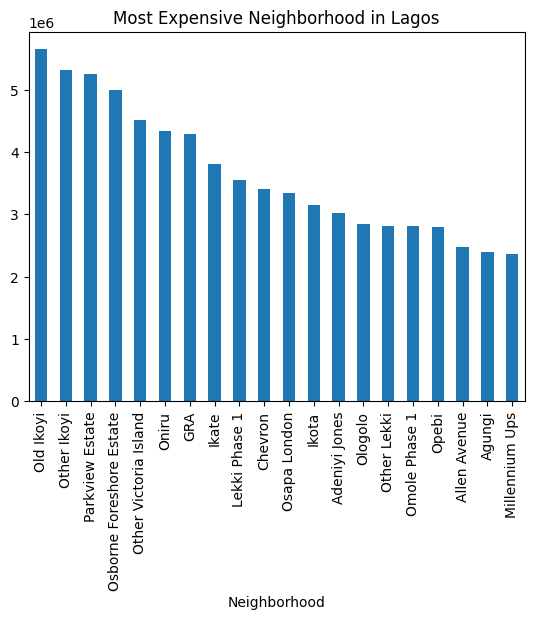

In [41]:
# checking the chart again
trimmed_df.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False).head(20).plot(
    kind='bar', title="Most Expensive Neighborhood in Lagos"
    )

## **Modeling**
## splitting data into x and y
Build a predictive model to determine the risk of early-stage diabetes. We will use a Random Forest Classifier for this task.

In [42]:
# Log transformation to stabilize variance
df['Price'] = np.log1p(df['Price'])

In [43]:
# Removing irrelevant columns for modeling
irrelevant_columns = ['Title', 'More Info', 'Neighborhood']
df = df.drop(irrelevant_columns, axis=1)

In [44]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = label_encoder.fit_transform(df[column])

In [45]:
df.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City
0,15.424949,0,1,0,5,5,6,5
1,15.424949,0,1,0,5,5,6,5
2,15.068274,1,0,0,3,4,4,5
3,14.808763,1,1,0,3,4,4,5
4,15.201805,1,0,0,5,6,6,5


In [46]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['Price'])
y = df['Price']

In [47]:
X.head()

,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City
0,0,1,0,5,5,6,5
1,0,1,0,5,5,6,5
2,1,0,0,3,4,4,5
3,1,1,0,3,4,4,5
4,1,0,0,5,6,6,5


In [48]:
y.head()

0    15.424949
1    15.424949
2    15.068274
3    14.808763
4    15.201805
Name: Price, dtype: float64

In [49]:
print(X.shape) 
print(y.shape)

(53070, 7)
(53070,)


In [50]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Feature Scaling with Power Transformation
scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Detecting and Handling Outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns][
    (np.abs(df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()) < 3]
df.dropna(inplace=True)

In [53]:
# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2')
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [54]:
# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": rf_grid.best_estimator_,
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    "Support Vector Regressor": SVR(C=100, epsilon=0.1),
}

In [55]:
results = {}

In [56]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

## Results

In [57]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                                  MAE       MSE      RMSE  R2 Score
Linear Regression            0.745106  1.171000  1.082128  0.220524
Random Forest Regressor      0.444952  0.634580  0.796605  0.577592
Gradient Boosting Regressor  0.448631  0.632979  0.795600  0.578658
Support Vector Regressor     0.457829  0.663811  0.814746  0.558134


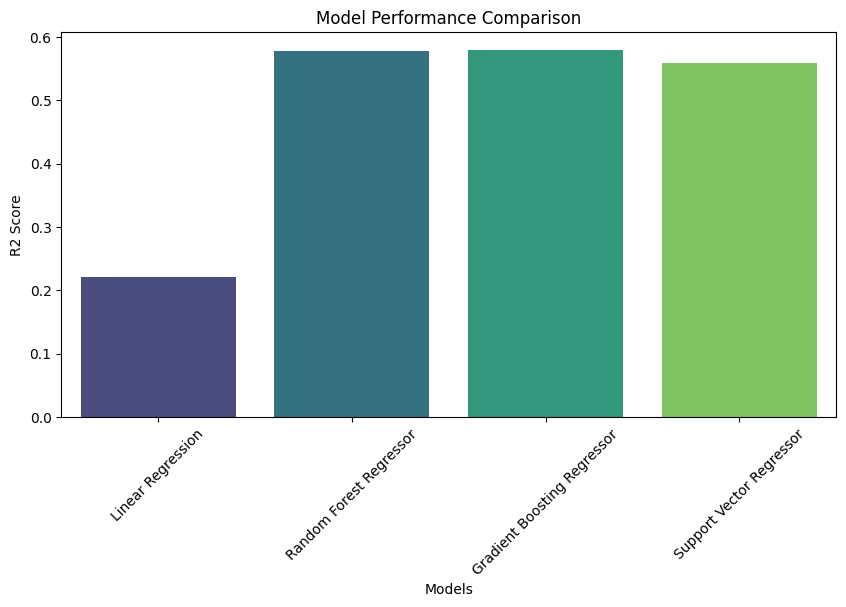

In [58]:
# Visualizing Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="viridis")
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

In [59]:
# Conclusion and Recommendation
best_model_name = results_df["R2 Score"].idxmax()
best_pipeline = Pipeline([
    ("powerTransformer", PowerTransformer()),
    (best_model_name.lower().replace(" ", ""), models[best_model_name])
])
best_pipeline.fit(X_train, y_train)
print(f"The best-performing model is {best_model_name} with an R2 score of {results_df.loc[best_model_name, 'R2 Score']:.4f}.")
print("Future improvements can include incorporating additional features,\n"
      "further hyperparameter tuning, and utilizing deep learning models for better accuracy.")


The best-performing model is Gradient Boosting Regressor with an R2 score of 0.5787.
Future improvements can include incorporating additional features,
further hyperparameter tuning, and utilizing deep learning models for better accuracy.


### Communicating Feature Importance
10 most important features affecting housing prices.

In [60]:
# Feature Importance for Gradient Boosting or Random Forest
if hasattr(models[best_model_name], "feature_importances_"):
    feature_importance = models[best_model_name].feature_importances_
    features = X_train.columns
    feat_imp = pd.Series(feature_importance, index=features).sort_values(ascending=True)
    print(feat_imp)

Furnished      0.000237
Newly Built    0.001586
Bathrooms      0.004039
Serviced       0.021215
Toilets        0.036799
City           0.370092
Bedrooms       0.566033
dtype: float64


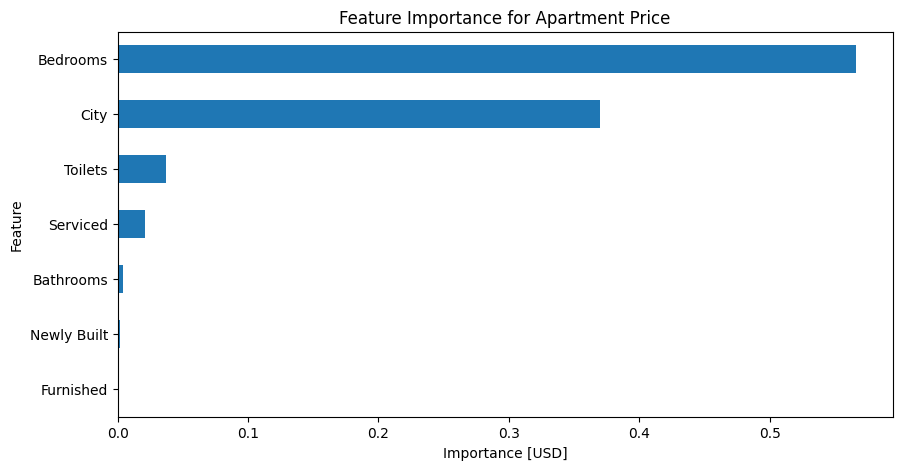

In [61]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 5))
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature Importance for Apartment Price")
plt.show()

## Communicate Results
Testing the model prediction using  best model 

In [62]:
def make_prediction(Serviced, Newly_Built, Furnished, Bedrooms, Bathrooms, Toilets, City):
    # Identify city columns from training data
    city_columns = [col for col in X_train.columns if "City_" in col]
    city_data = {col: 0 for col in city_columns}  # Initialize all cities as 0
    
    city_column = f"City_{City}"  # Format the selected city
    if city_column in city_data:
        city_data[city_column] = 1  # Set the selected city to 1

    # Create DataFrame with necessary fields
    data = pd.DataFrame({
        "Serviced": [Serviced],
        "Newly Built": [Newly_Built],
        "Furnished": [Furnished],
        "Bedrooms": [Bedrooms],
        "Bathrooms": [Bathrooms],
        "Toilets": [Toilets],
        **city_data  # Merge city encoding
    })

    # Ensure consistency with training data
    missing_cols = set(X_train.columns) - set(data.columns)
    for col in missing_cols:
        data[col] = 0  # Add missing columns with 0 values

    # Reorder columns
    data = data[X_train.columns]

    # Make prediction
    prediction = best_pipeline.predict(data)
    print(f"Predicted apartment price: ₦{np.expm1(prediction)[0]:,.2f}")


In [63]:
# Example test case
make_prediction(Serviced=1, Newly_Built=1, Furnished=1, Bedrooms=2, Bathrooms=2, Toilets=2, City="Lekki")

Predicted apartment price: ₦4,092,257.18


# Interactive function for real-time prediction


In [64]:
# Interactive function for real-time prediction
def interactive_prediction():
    serviced = widgets.Dropdown(options=[0, 1], value=0, description="Serviced:")
    newly_built = widgets.Dropdown(options=[0, 1], value=0, description="Newly Built:")
    furnished = widgets.Dropdown(options=[0, 1], value=0, description="Furnished:")
    bedrooms = widgets.IntSlider(min=1, max=10, value=3, description="Bedrooms:")
    bathrooms = widgets.IntSlider(min=1, max=10, value=2, description="Bathrooms:")
    toilets = widgets.IntSlider(min=1, max=10, value=3, description="Toilets:")
    city = widgets.Dropdown(options=df["City"].unique().tolist(), description="City:")
    
    output = widgets.Output()

    def update_prediction(*args):
        with output:
            output.clear_output(wait=True)
            make_prediction(serviced.value, newly_built.value, furnished.value, bedrooms.value, 
                            bathrooms.value, toilets.value, city.value)
    
    for widget in [serviced, newly_built, furnished, bedrooms, bathrooms, toilets, city]:
        widget.observe(update_prediction, names="value")
    
    display(serviced, newly_built, furnished, bedrooms, bathrooms, toilets, city, output)
    update_prediction()

# Run interactive prediction
interactive_prediction()

Dropdown(description='Serviced:', options=(0, 1), value=0)

Dropdown(description='Newly Built:', options=(0, 1), value=0)

Dropdown(description='Furnished:', options=(0, 1), value=0)

IntSlider(value=3, description='Bedrooms:', max=10, min=1)

IntSlider(value=2, description='Bathrooms:', max=10, min=1)

IntSlider(value=3, description='Toilets:', max=10, min=1)

Dropdown(description='City:', options=(5, 3, 2, 4, 6, 1, 7, 0, 8), value=5)

Output()